In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


train_path = '/kaggle/input/datasets/mohammadhajiazizi/azizi123456/dataset/train.csv'
store_path = '/kaggle/input/datasets/mohammadhajiazizi/azizi123456/dataset/store.csv'

# Load datasets
train = pd.read_csv(train_path, parse_dates=['Date'], low_memory=False)
store = pd.read_csv(store_path)

# Merge train with store information
df = pd.merge(train, store, on='Store', how='left')

# Basic Info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [40]:
import numpy as np

print(df.shape)
print(df["Date"].min(), df["Date"].max())
print(df.isna().mean().sort_values(ascending=False).head(25))
print(df.describe(include="all").T.head(25))

(1017209, 18)
2013-01-01 00:00:00 2015-07-31 00:00:00
Promo2SinceWeek              0.499436
PromoInterval                0.499436
Promo2SinceYear              0.499436
CompetitionOpenSinceYear     0.317878
CompetitionOpenSinceMonth    0.317878
CompetitionDistance          0.002597
DayOfWeek                    0.000000
Store                        0.000000
Date                         0.000000
Sales                        0.000000
StoreType                    0.000000
SchoolHoliday                0.000000
StateHoliday                 0.000000
Promo                        0.000000
Open                         0.000000
Customers                    0.000000
Assortment                   0.000000
Promo2                       0.000000
dtype: float64
                               count unique              top    freq  \
Store                      1017209.0    NaN              NaN     NaN   
DayOfWeek                  1017209.0    NaN              NaN     NaN   
Date                         10

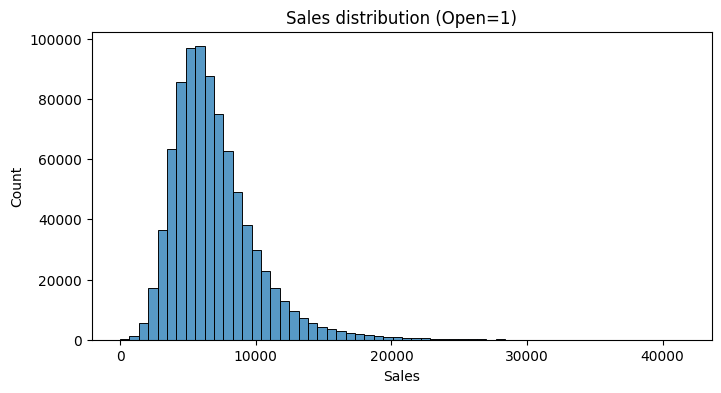

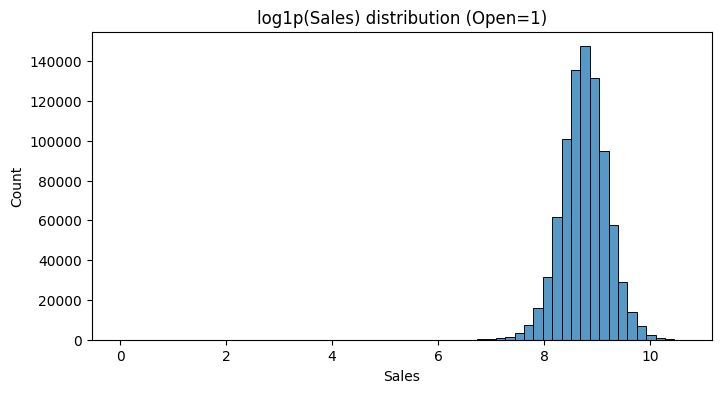

In [41]:
tmp = df[df["Open"]==1].copy()
plt.figure(figsize=(8,4))
sns.histplot(tmp["Sales"], bins=60, kde=False)
plt.title("Sales distribution (Open=1)")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(np.log1p(tmp["Sales"]), bins=60, kde=False)
plt.title("log1p(Sales) distribution (Open=1)")
plt.show()

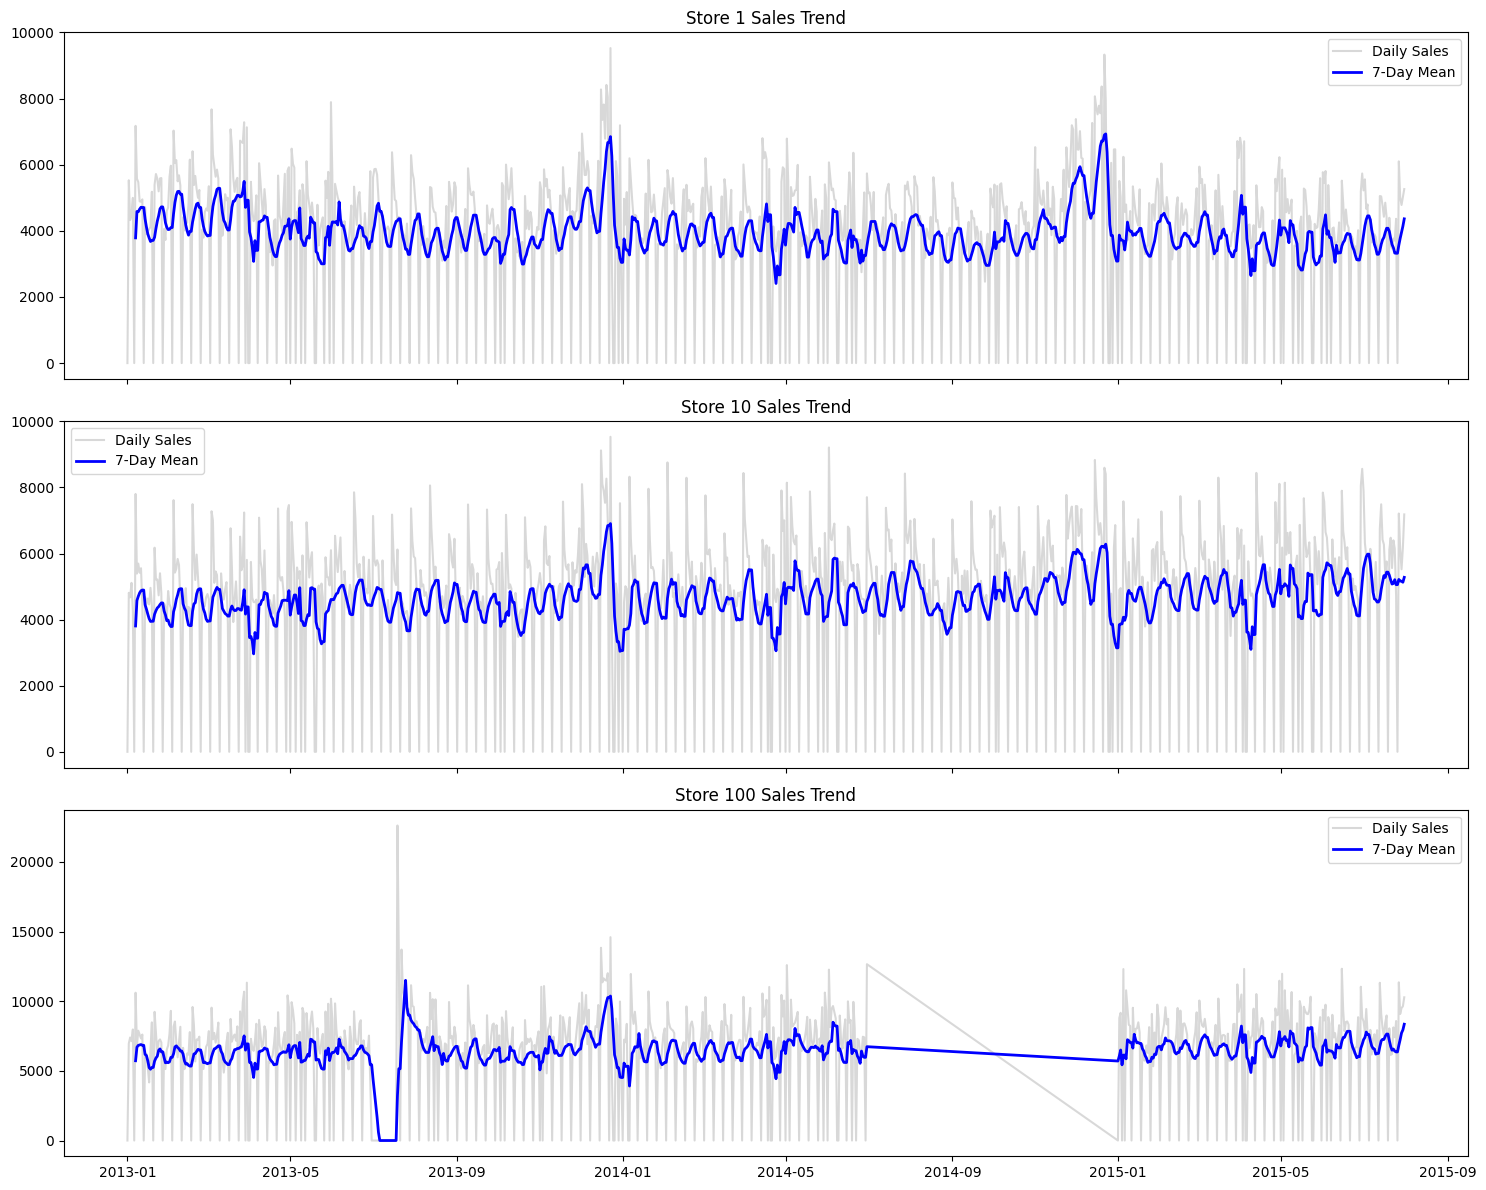

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sample_stores = [1, 10, 100]
fig, axes = plt.subplots(len(sample_stores), 1, figsize=(15, 12), sharex=True)

for i, store_id in enumerate(sample_stores):
    store_data = df[df['Store'] == store_id].sort_values('Date')

    axes[i].plot(store_data['Date'], store_data['Sales'], alpha=0.3, label='Daily Sales', color='gray')

    rolling_sales = store_data.set_index('Date')['Sales'].rolling(window=7).mean()
    axes[i].plot(rolling_sales.index, rolling_sales.values, label='7-Day Mean', color='blue', linewidth=2)

    axes[i].set_title(f'Store {store_id} Sales Trend')
    axes[i].legend()

plt.tight_layout()
plt.show()

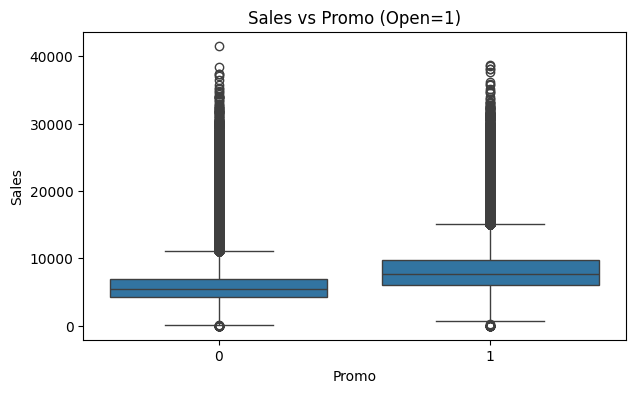

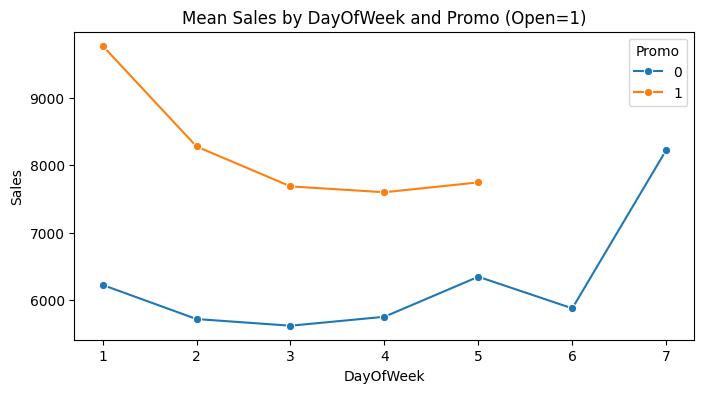

In [43]:
tmp = df[df["Open"]==1].copy()
plt.figure(figsize=(7,4))
sns.boxplot(data=tmp, x="Promo", y="Sales")
plt.title("Sales vs Promo (Open=1)")
plt.show()

promo_by_dow = tmp.groupby(["DayOfWeek","Promo"], as_index=False)["Sales"].mean()
plt.figure(figsize=(8,4))
sns.lineplot(data=promo_by_dow, x="DayOfWeek", y="Sales", hue="Promo", marker="o")
plt.title("Mean Sales by DayOfWeek and Promo (Open=1)")
plt.show()

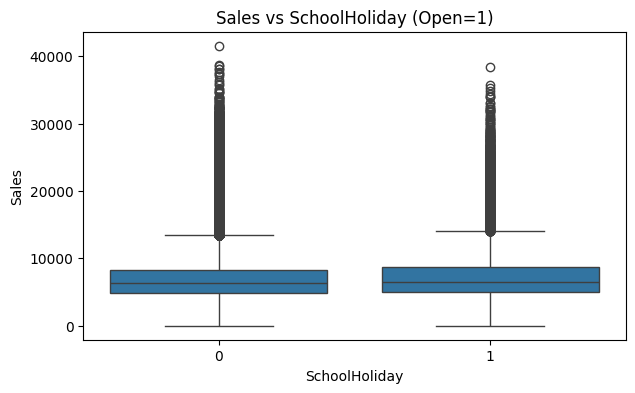

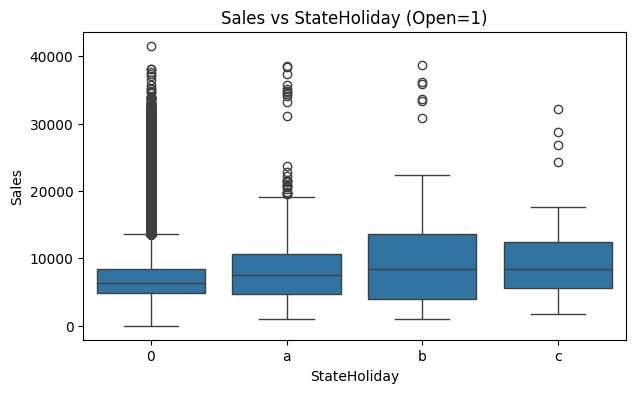

In [44]:
tmp = df[df["Open"]==1].copy()
plt.figure(figsize=(7,4))
sns.boxplot(data=tmp, x="SchoolHoliday", y="Sales")
plt.title("Sales vs SchoolHoliday (Open=1)")
plt.show()

tmp2 = tmp.copy()
tmp2["StateHoliday"] = tmp2["StateHoliday"].astype(str)
plt.figure(figsize=(7,4))
sns.boxplot(data=tmp2, x="StateHoliday", y="Sales")
plt.title("Sales vs StateHoliday (Open=1)")
plt.show()

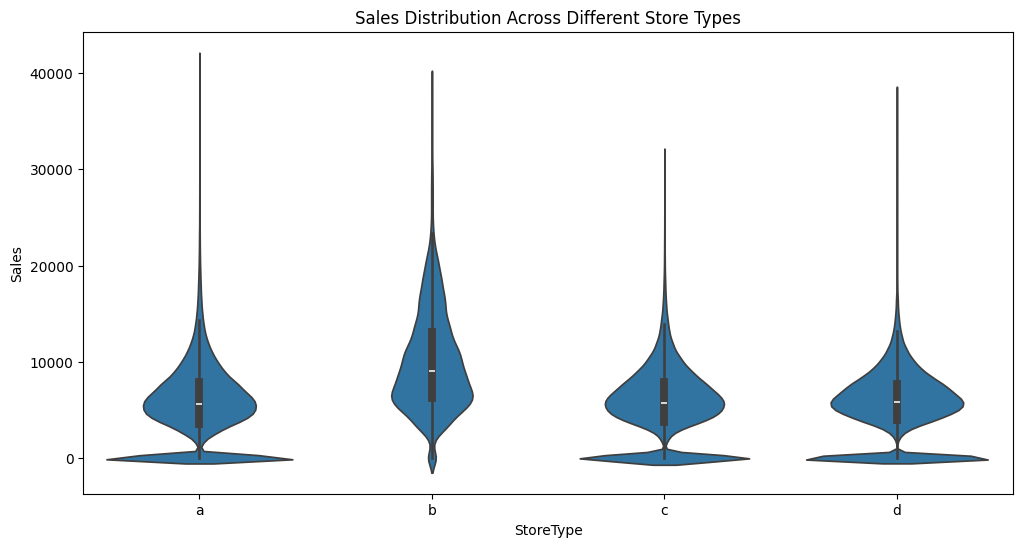

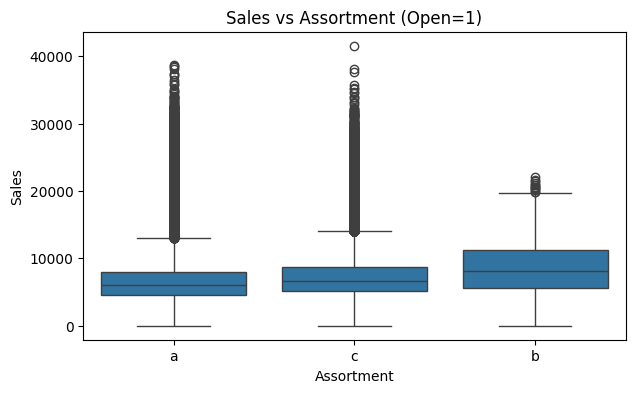

In [45]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='StoreType', y='Sales', order=['a', 'b', 'c', 'd'])
plt.title('Sales Distribution Across Different Store Types')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data=tmp, x="Assortment", y="Sales")
plt.title("Sales vs Assortment (Open=1)")
plt.show()

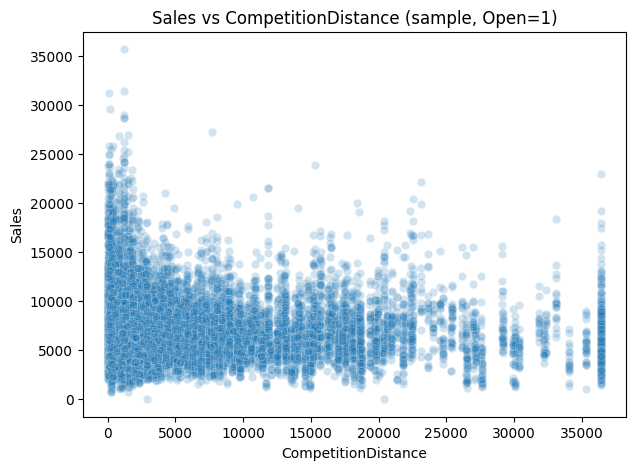

/tmp/ipykernel_55/2365896575.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  b = tmp.groupby(bins, as_index=False)["Sales"].mean()
/tmp/ipykernel_55/2365896575.py:11: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  b = tmp.groupby(bins, as_index=False)["Sales"].mean()


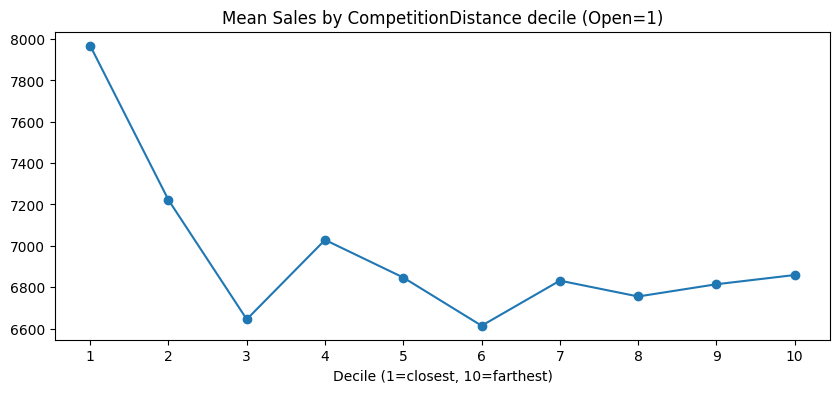

In [46]:
tmp = df[df["Open"]==1].copy()
tmp = tmp[tmp["CompetitionDistance"].notna()].copy()
tmp["CompetitionDistance"] = tmp["CompetitionDistance"].clip(upper=tmp["CompetitionDistance"].quantile(0.99))

plt.figure(figsize=(7,5))
sns.scatterplot(data=tmp.sample(min(len(tmp), 20000), random_state=42), x="CompetitionDistance", y="Sales", alpha=0.2)
plt.title("Sales vs CompetitionDistance (sample, Open=1)")
plt.show()

bins = pd.qcut(tmp["CompetitionDistance"], q=10, duplicates="drop")
b = tmp.groupby(bins, as_index=False)["Sales"].mean()
plt.figure(figsize=(10,4))
plt.plot(range(len(b)), b["Sales"].values, marker="o")
plt.title("Mean Sales by CompetitionDistance decile (Open=1)")
plt.xticks(range(len(b)), [str(i+1) for i in range(len(b))])
plt.xlabel("Decile (1=closest, 10=farthest)")
plt.show()

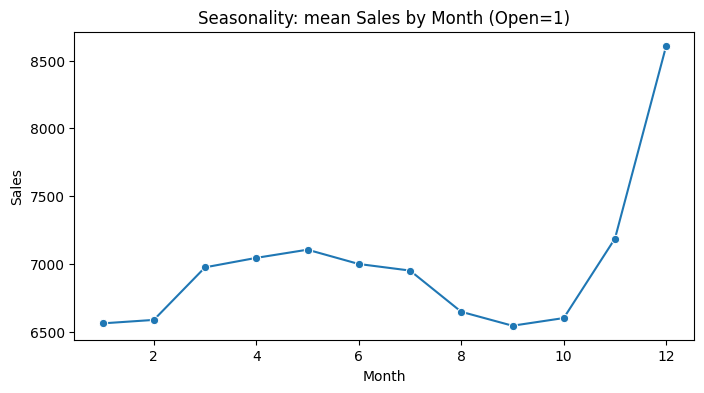

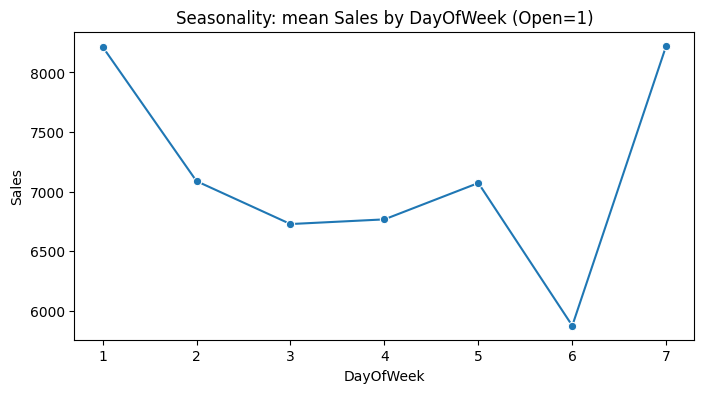

In [47]:
tmp = df[df["Open"]==1].copy()
tmp["Year"] = tmp["Date"].dt.year
tmp["Month"] = tmp["Date"].dt.month

m = tmp.groupby("Month", as_index=False)["Sales"].mean()
plt.figure(figsize=(8,4))
sns.lineplot(data=m, x="Month", y="Sales", marker="o")
plt.title("Seasonality: mean Sales by Month (Open=1)")
plt.show()

dow = tmp.groupby("DayOfWeek", as_index=False)["Sales"].mean()
plt.figure(figsize=(8,4))
sns.lineplot(data=dow, x="DayOfWeek", y="Sales", marker="o")
plt.title("Seasonality: mean Sales by DayOfWeek (Open=1)")
plt.show()

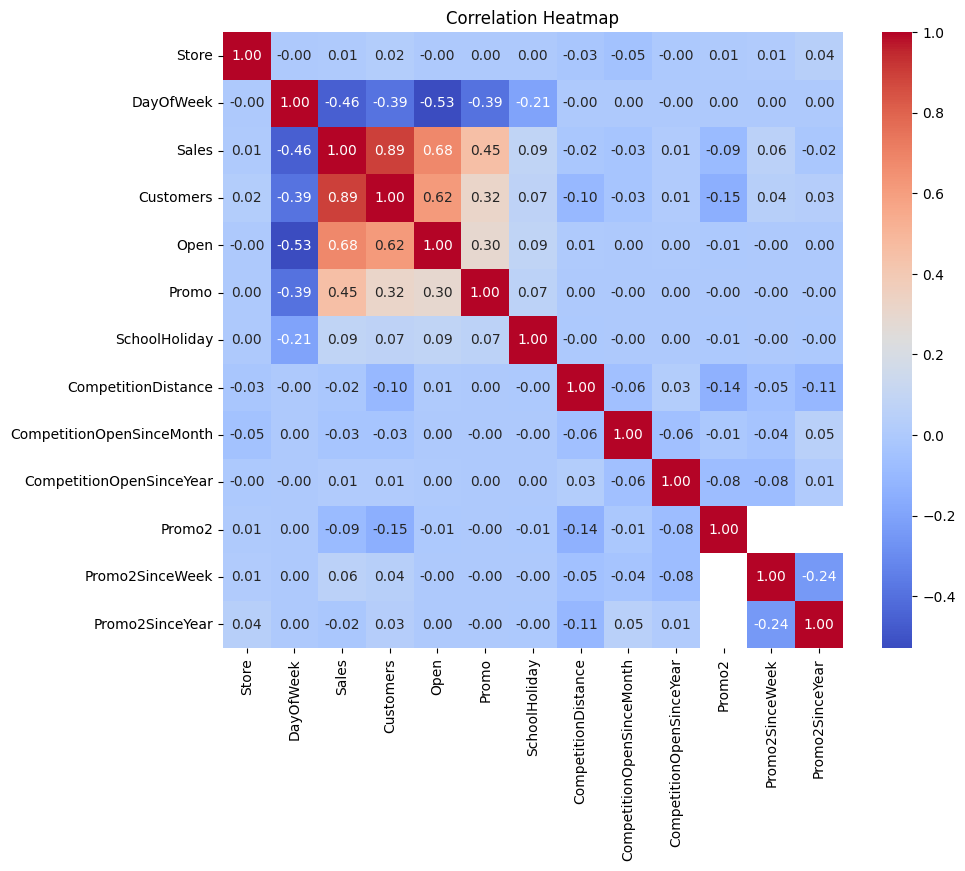

In [48]:
plt.figure(figsize=(10, 8))
# We only correlate numerical columns
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

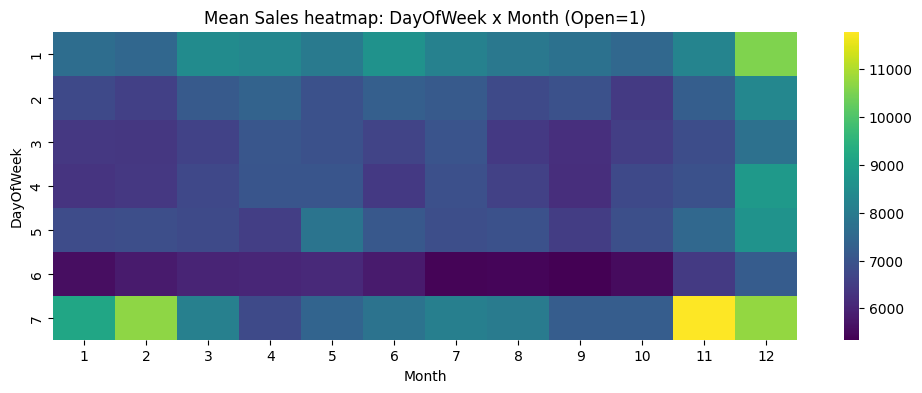

In [49]:
tmp = df[df["Open"]==1].copy()
tmp["Month"] = tmp["Date"].dt.month
pivot = tmp.pivot_table(index="DayOfWeek", columns="Month", values="Sales", aggfunc="mean")

plt.figure(figsize=(12,4))
sns.heatmap(pivot, cmap="viridis")
plt.title("Mean Sales heatmap: DayOfWeek x Month (Open=1)")
plt.show()

In [50]:
df = pd.merge(train, store, on='Store', how='left')
print(df.shape)
print("stores in train:", train["Store"].nunique(), "stores in store:", store["Store"].nunique())
print("unmatched stores:", df["StoreType"].isna().sum())
df.head()

(1017209, 18)
stores in train: 1115 stores in store: 1115
unmatched stores: 0


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [51]:
df[:]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [52]:
nan_counts = df.isna().sum()
nan_total = int(df.isna().sum().sum())

print("Total NaN cells:", nan_total)
nan_counts[nan_counts > 0].sort_values(ascending=False)

Total NaN cells: 2173431


Promo2SinceYear              508031
Promo2SinceWeek              508031
PromoInterval                508031
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
CompetitionDistance            2642
dtype: int64

In [53]:
import pandas as pd

df["Date"] = pd.to_datetime(df["Date"])

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["DayOfWeek0"] = df["Date"].dt.dayofweek
df["WeekOfYear"] = df["Date"].dt.isocalendar().week.astype(int)

df["StateHoliday"] = df["StateHoliday"].astype(str).map({"0": 0, "a": 1, "b": 1, "c": 1}).fillna(0).astype(int)
df["SchoolHoliday"] = df["SchoolHoliday"].astype(int)

df = df.sort_values(["Store","Date"]).reset_index(drop=True)

s1 = df.groupby("Store")["Sales"].shift(1)
df["SalesMovingAverage7"] = s1.groupby(df["Store"]).rolling(window=7, min_periods=1).mean().reset_index(level=0, drop=True)
df["SalesMovingAverage30"] = s1.groupby(df["Store"]).rolling(window=30, min_periods=1).mean().reset_index(level=0, drop=True)

df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,DayOfWeek0,WeekOfYear,SalesMovingAverage7,SalesMovingAverage30
0,1,2,2013-01-01,0,0,0,0,1,1,c,...,NaN,NaN,NaN,2013,1,1,1,1,NaN,NaN
1,1,3,2013-01-02,5530,668,1,0,0,1,c,...,NaN,NaN,NaN,2013,1,2,2,1,0.000000,0.000000
2,1,4,2013-01-03,4327,578,1,0,0,1,c,...,NaN,NaN,NaN,2013,1,3,3,1,2765.000000,2765.000000
3,1,5,2013-01-04,4486,619,1,0,0,1,c,...,NaN,NaN,NaN,2013,1,4,4,1,3285.666667,3285.666667
4,1,6,2013-01-05,4997,635,1,0,0,1,c,...,NaN,NaN,NaN,2013,1,5,5,1,3585.750000,3585.750000


In this step, we convert Date to a datetime format and extract calendar-based features such as year, month, day, and week number. Then, the holiday indicators (StateHoliday and SchoolHoliday) are encoded into numeric values. Finally, after sorting by store and date, we compute 7-day and 30-day moving averages of sales using only previous days (shift(1)) to avoid data leakage.

In [54]:
df = df.sort_values(["Store","Date"]).reset_index(drop=True)

g = df.groupby("Store")["Sales"]

df["SalesLag1"] = g.shift(1)
df["SalesLag7"] = g.shift(7)

s1 = g.shift(1)
df["SalesMean7"] = s1.groupby(df["Store"]).rolling(7, min_periods=1).mean().reset_index(level=0, drop=True)
df["SalesStd7"] = s1.groupby(df["Store"]).rolling(7, min_periods=2).std().reset_index(level=0, drop=True)

df["SalesMean30"] = s1.groupby(df["Store"]).rolling(30, min_periods=1).mean().reset_index(level=0, drop=True)
df["SalesStd30"] = s1.groupby(df["Store"]).rolling(30, min_periods=2).std().reset_index(level=0, drop=True)

df['SalesLag1'] = df.groupby('Store')['SalesLag1'].transform(lambda x: x.fillna(0, limit=1))
df['SalesLag7'] = df.groupby('Store')['SalesLag7'].transform(lambda x: x.fillna(0, limit=7))
df['SalesMovingAverage7'] = df.groupby('Store')['SalesMovingAverage7'].transform(lambda x: x.fillna(0, limit=1))
df['SalesMean7'] = df.groupby('Store')['SalesMean7'].transform(lambda x: x.fillna(0, limit=1))
df['SalesMovingAverage30'] = df.groupby('Store')['SalesMovingAverage30'].transform(lambda x: x.fillna(0, limit=1))
df['SalesStd7'] = df.groupby('Store')['SalesStd7'].transform(lambda x: x.fillna(0, limit=2))
df['SalesMean30'] = df.groupby('Store')['SalesMean30'].transform(lambda x: x.fillna(0, limit=1))
df['SalesStd30'] = df.groupby('Store')['SalesStd30'].transform(lambda x: x.fillna(0, limit=2))


df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,DayOfWeek0,WeekOfYear,SalesMovingAverage7,SalesMovingAverage30,SalesLag1,SalesLag7,SalesMean7,SalesStd7,SalesMean30,SalesStd30
0,1,2,2013-01-01,0,0,0,0,1,1,c,...,1,1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1,3,2013-01-02,5530,668,1,0,0,1,c,...,2,1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,1,4,2013-01-03,4327,578,1,0,0,1,c,...,3,1,2765.000000,2765.000000,5530.0,0.0,2765.000000,3910.300500,2765.000000,3910.300500
3,1,5,2013-01-04,4486,619,1,0,0,1,c,...,4,1,3285.666667,3285.666667,4327.0,0.0,3285.666667,2908.351137,3285.666667,2908.351137
4,1,6,2013-01-05,4997,635,1,0,0,1,c,...,5,1,3585.750000,3585.750000,4486.0,0.0,3585.750000,2449.327306,3585.750000,2449.327306


To prevent the moving averages from becoming zero in the first days, we computed rolling features with min_periods=1 (and min_periods=2 for standard deviation), so the statistics are calculated using whatever history is available instead of producing NaNs that would later be filled with zeros.

In [55]:
df[['Store', 'Date', 'Sales', 'SalesLag1','SalesLag7', 'SalesMean7', 'SalesStd7','SalesMean30','SalesStd30']].head(10)

,Store,Date,Sales,SalesLag1,SalesLag7,SalesMean7,SalesStd7,SalesMean30,SalesStd30
0,1,2013-01-01,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1,2013-01-02,5530,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,1,2013-01-03,4327,5530.0,0.0,2765.000000,3910.300500,2765.000000,3910.300500
3,1,2013-01-04,4486,4327.0,0.0,3285.666667,2908.351137,3285.666667,2908.351137
4,1,2013-01-05,4997,4486.0,0.0,3585.750000,2449.327306,3585.750000,2449.327306
5,1,2013-01-06,0,4997.0,0.0,3868.000000,2213.081223,3868.000000,2213.081223
6,1,2013-01-07,7176,0.0,0.0,3223.333333,2532.144045,3223.333333,2532.144045
7,1,2013-01-08,5580,7176.0,0.0,3788.000000,2752.283961,3788.000000,2752.283961
8,1,2013-01-09,5471,5580.0,5530.0,4585.142857,2231.018633,4012.000000,2625.704205
9,1,2013-01-10,4892,5471.0,4327.0,4576.714286,2226.961885,4174.111111,2503.807573




> We also added 30-day rolling statistics based only on past sales: SalesMean30 (30-day rolling mean) and SalesStd30 (30-day rolling standard deviation) computed per store using shifted sales to avoid leakage.



In [56]:

df["Date"] = pd.to_datetime(df["Date"])

df["StateHoliday"] = df["StateHoliday"].fillna("0").astype(str)
df["IsStateHoliday"] = (df["StateHoliday"] != "0").astype(int)

print(df["StateHoliday"].value_counts(dropna=False).head(10))
print(df["IsStateHoliday"].value_counts(dropna=False))
df_L=df.copy()

StateHoliday
0    986159
1     31050
Name: count, dtype: int64
IsStateHoliday
0    986159
1     31050
Name: count, dtype: int64


In [57]:
import numpy as np
import pandas as pd

df = df.sort_values(["Date"]).reset_index(drop=True)

df["DayOfYear"] = df["Date"].dt.dayofyear
t = 2*np.pi*df["DayOfYear"]/365.25
df["sin_1y"] = np.sin(t)
df["cos_1y"] = np.cos(t)
df["sin_2y"] = np.sin(2*t)
df["cos_2y"] = np.cos(2*t)

dates = pd.Index(df["Date"].unique()).sort_values()
is_h = df.groupby("Date")["IsStateHoliday"].max().reindex(dates).fillna(0).astype(int)
h_dates = dates[is_h.values == 1]

prev_h = pd.Series(pd.NaT, index=dates)
next_h = pd.Series(pd.NaT, index=dates)

prev_h.loc[h_dates] = h_dates
next_h.loc[h_dates] = h_dates
prev_h = prev_h.ffill()
next_h = next_h.bfill()

dist_prev = (dates - prev_h.values).days
dist_next = (next_h.values - dates).days

df["DaysSinceHoliday"] = df["Date"].map(pd.Series(dist_prev, index=dates).fillna(0).astype(int)).astype(int)
df["DaysToNextHoliday"] = df["Date"].map(pd.Series(dist_next, index=dates).fillna(0).astype(int)).astype(int)

df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,SalesMean30,SalesStd30,IsStateHoliday,DayOfYear,sin_1y,cos_1y,sin_2y,cos_2y,DaysSinceHoliday,DaysToNextHoliday
0,1,2,2013-01-01,0,0,0,0,1,1,c,...,0.0,0.0,1,1,0.017202,0.999852,0.034398,0.999408,0,0
1,304,2,2013-01-01,0,0,0,0,1,1,a,...,0.0,0.0,1,1,0.017202,0.999852,0.034398,0.999408,0,0
2,986,2,2013-01-01,0,0,0,0,1,1,a,...,0.0,0.0,1,1,0.017202,0.999852,0.034398,0.999408,0,0
3,724,2,2013-01-01,0,0,0,0,1,1,d,...,0.0,0.0,1,1,0.017202,0.999852,0.034398,0.999408,0,0
4,805,2,2013-01-01,0,0,0,0,1,1,d,...,0.0,0.0,1,1,0.017202,0.999852,0.034398,0.999408,0,0


We build Fourier seasonal features using DayOfYear. The terms sin_1y/cos_1y capture the main annual (1-year) seasonality while sin_2y/cos_2y model more complex within-year patterns (e.g., two peaks during the year).

In [58]:
df[["Date","IsStateHoliday","DaysSinceHoliday","DaysToNextHoliday"]].head(10000)

,Date,IsStateHoliday,DaysSinceHoliday,DaysToNextHoliday
0,2013-01-01,1,0,0
1,2013-01-01,1,0,0
2,2013-01-01,1,0,0
3,2013-01-01,1,0,0
4,2013-01-01,1,0,0
...,...,...,...,...
9995,2013-01-09,0,3,79
9996,2013-01-09,0,3,79
9997,2013-01-09,0,3,79
9998,2013-01-09,0,3,79


In [59]:
print(df["IsStateHoliday"].value_counts())
print(df.loc[df["IsStateHoliday"]==1, ["Date"]].drop_duplicates().head(10))

IsStateHoliday
0    986159
1     31050
Name: count, dtype: int64
             Date
0      2013-01-01
5577   2013-01-06
97004  2013-03-29
100349 2013-04-01
133799 2013-05-01
142719 2013-05-09
154984 2013-05-20
166134 2013-05-30
251997 2013-08-15
306624 2013-10-03


In [60]:
missing_counts = df.isna().sum()
missing_pct = (df.isna().mean() * 100).round(3)

missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_percent": missing_pct
}).sort_values("missing_count", ascending=False)

missing_summary[missing_summary["missing_count"] > 0]

,missing_count,missing_percent
Promo2SinceWeek,508031,49.944
PromoInterval,508031,49.944
Promo2SinceYear,508031,49.944
CompetitionOpenSinceYear,323348,31.788
CompetitionOpenSinceMonth,323348,31.788
CompetitionDistance,2642,0.260


In [61]:
df_z = df.copy()

num_cols = df_z.select_dtypes(include=[np.number]).columns
bin_cols = [c for c in num_cols if df_z[c].dropna().isin([0,1]).all()]
z_cols = [c for c in num_cols if c not in bin_cols]

df_z[z_cols] = df_z[z_cols].fillna(df_z[z_cols].median())

mu = df_z[z_cols].mean()
sigma = df_z[z_cols].std().replace(0, 1)

df_z[z_cols] = (df_z[z_cols] - mu) / sigma

df_z.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,SalesMean30,SalesStd30,IsStateHoliday,DayOfYear,sin_1y,cos_1y,sin_2y,cos_2y,DaysSinceHoliday,DaysToNextHoliday
0,-1.731639,-1.000475,2013-01-01,-1.499722,-1.363329,0,0,1,1,c,...,-2.669743,-2.717337,1,-1.587113,-0.179271,1.442531,0.027059,1.368905,-1.104201,-1.011865
1,-0.790379,-1.000475,2013-01-01,-1.499722,-1.363329,0,0,1,1,a,...,-2.669743,-2.717337,1,-1.587113,-0.179271,1.442531,0.027059,1.368905,-1.104201,-1.011865
2,1.328235,-1.000475,2013-01-01,-1.499722,-1.363329,0,0,1,1,a,...,-2.669743,-2.717337,1,-1.587113,-0.179271,1.442531,0.027059,1.368905,-1.104201,-1.011865
3,0.514339,-1.000475,2013-01-01,-1.499722,-1.363329,0,0,1,1,d,...,-2.669743,-2.717337,1,-1.587113,-0.179271,1.442531,0.027059,1.368905,-1.104201,-1.011865
4,0.765963,-1.000475,2013-01-01,-1.499722,-1.363329,0,0,1,1,d,...,-2.669743,-2.717337,1,-1.587113,-0.179271,1.442531,0.027059,1.368905,-1.104201,-1.011865


In [62]:
df_mm = df.copy()

num_cols = df_mm.select_dtypes(include=[np.number]).columns
df_mm[num_cols] = df_mm[num_cols].fillna(df_mm[num_cols].median())

mn = df_mm[num_cols].min()
mx = df_mm[num_cols].max()
den = (mx - mn).replace(0, 1)

df_mm[num_cols] = (df_mm[num_cols] - mn) / den

df_mm.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,SalesMean30,SalesStd30,IsStateHoliday,DayOfYear,sin_1y,cos_1y,sin_2y,cos_2y,DaysSinceHoliday,DaysToNextHoliday
0,0.000000,0.166667,2013-01-01,0.0,0.0,0.0,0.0,1,1.0,c,...,0.0,0.0,1.0,0.0,0.508604,0.999931,0.517211,0.999723,0.0,0.0
1,0.271993,0.166667,2013-01-01,0.0,0.0,0.0,0.0,1,1.0,a,...,0.0,0.0,1.0,0.0,0.508604,0.999931,0.517211,0.999723,0.0,0.0
2,0.884201,0.166667,2013-01-01,0.0,0.0,0.0,0.0,1,1.0,a,...,0.0,0.0,1.0,0.0,0.508604,0.999931,0.517211,0.999723,0.0,0.0
3,0.649013,0.166667,2013-01-01,0.0,0.0,0.0,0.0,1,1.0,d,...,0.0,0.0,1.0,0.0,0.508604,0.999931,0.517211,0.999723,0.0,0.0
4,0.721724,0.166667,2013-01-01,0.0,0.0,0.0,0.0,1,1.0,d,...,0.0,0.0,1.0,0.0,0.508604,0.999931,0.517211,0.999723,0.0,0.0


In [63]:
df_mm[:]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,SalesMean30,SalesStd30,IsStateHoliday,DayOfYear,sin_1y,cos_1y,sin_2y,cos_2y,DaysSinceHoliday,DaysToNextHoliday
0,0.000000,0.166667,2013-01-01,0.000000,0.000000,0.0,0.0,1,1.0,c,...,0.000000,0.000000,1.0,0.00000,0.508604,0.999931,0.517211,0.999723,0.000000,0.0
1,0.271993,0.166667,2013-01-01,0.000000,0.000000,0.0,0.0,1,1.0,a,...,0.000000,0.000000,1.0,0.00000,0.508604,0.999931,0.517211,0.999723,0.000000,0.0
2,0.884201,0.166667,2013-01-01,0.000000,0.000000,0.0,0.0,1,1.0,a,...,0.000000,0.000000,1.0,0.00000,0.508604,0.999931,0.517211,0.999723,0.000000,0.0
3,0.649013,0.166667,2013-01-01,0.000000,0.000000,0.0,0.0,1,1.0,d,...,0.000000,0.000000,1.0,0.00000,0.508604,0.999931,0.517211,0.999723,0.000000,0.0
4,0.721724,0.166667,2013-01-01,0.000000,0.000000,0.0,0.0,1,1.0,d,...,0.000000,0.000000,1.0,0.00000,0.508604,0.999931,0.517211,0.999723,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0.309695,0.666667,2015-07-31,0.215013,0.099350,1.0,1.0,0,1.0,a,...,0.257513,0.156102,0.0,0.57967,0.257957,0.062481,0.923608,0.765672,0.542857,0.0
1017205,0.308797,0.666667,2015-07-31,0.120069,0.068354,1.0,1.0,0,0.0,a,...,0.152998,0.104994,0.0,0.57967,0.257957,0.062481,0.923608,0.765672,0.542857,0.0
1017206,0.307899,0.666667,2015-07-31,0.307261,0.194099,1.0,1.0,0,1.0,a,...,0.323261,0.207554,0.0,0.57967,0.257957,0.062481,0.923608,0.765672,0.542857,0.0
1017207,0.864452,0.666667,2015-07-31,0.300402,0.211153,1.0,1.0,0,1.0,a,...,0.309846,0.196180,0.0,0.57967,0.257957,0.062481,0.923608,0.765672,0.542857,0.0


The PromoInterval column was transformed from a sparse categorical string into a binary numeric feature by mapping the current month to the scheduled promotion cycles. This process eliminated all NaN values by assigning 1 to active promotion months and 0 to others, allowing the model to effectively capture the impact of recurring discounts during training and scaling.

We implemented two independent normalization strategies in separate cells. First, we created df_z and applied Z-score standardization only to non-binary numeric features (leaving 0/1 indicators unchanged), so those features have approximately zero mean and unit variance. Second, we created df_mm and applied Min–Max normalization to scale numeric features into the [0,1] range. Using separate copies ensures the two normalizations do not affect each other

To handle missing values, we first identified all NaN entries and checked which columns contained missing data. We treated missingness based on the meaning of each feature:

Categorical features (e.g., PromoInterval): NaNs often mean “not applicable” (e.g., stores without Promo2).

Numeric features (e.g., competition and Promo2 date/distance fields): when NaNs represent “unknown” or “not reported,” we filled them with a robust statistic (typically the median) to avoid losing rows, and (when relevant) we also used an indicator meaning “feature exists/active” (e.g., competition exists vs. not).

Before applying normalization, we ensured there were no remaining NaNs in numeric columns by imputing them (median), and we handled edge cases where a column had zero variance to avoid division-by-zero during scaling.

In [67]:
df = df_mm.sort_values(["Date","Store"]).reset_index(drop=True)

dates = np.array(sorted(df["Date"].unique()))
n = len(dates)

train_end = int(0.70 * n)
val_end   = int(0.85 * n)

train_dates = set(dates[:train_end])
val_dates   = set(dates[train_end:val_end])
test_dates  = set(dates[val_end:])

train_df = df[df["Date"].isin(train_dates)].reset_index(drop=True)
val_df   = df[df["Date"].isin(val_dates)].reset_index(drop=True)
test_df  = df[df["Date"].isin(test_dates)].reset_index(drop=True)

print("Monotonic:", df["Date"].is_monotonic_increasing)
print(f"Train dates: {train_df['Date'].min()} to {train_df['Date'].max()}")
print(f"Val dates:   {val_df['Date'].min()} to {val_df['Date'].max()}")
print(f"Test dates:  {test_df['Date'].min()} to {test_df['Date'].max()}")

print("No overlap train/val:", train_df["Date"].max() < val_df["Date"].min())
print("No overlap val/test :", val_df["Date"].max() < test_df["Date"].min())

Monotonic: True
Train dates: 2013-01-01 00:00:00 to 2014-10-21 00:00:00
Val dates:   2014-10-22 00:00:00 to 2015-03-11 00:00:00
Test dates:  2015-03-12 00:00:00 to 2015-07-31 00:00:00
No overlap train/val: True
No overlap val/test : True


In [68]:
print("Train rows:", len(train_df))
print("Val rows  :", len(val_df))
print("Test rows :", len(test_df))

print("Train unique dates:", train_df["Date"].nunique())
print("Val unique dates  :", val_df["Date"].nunique())
print("Test unique dates :", test_df["Date"].nunique())

Train rows: 714444
Val rows  : 144435
Test rows : 158330
Train unique dates: 659
Val unique dates  : 141
Test unique dates : 142


In [28]:
train_df.PromoInterval.value_counts()

PromoInterval
Jan,Apr,Jul,Oct     206979
Feb,May,Aug,Nov      83297
Mar,Jun,Sept,Dec     68385
Name: count, dtype: int64

We split the dataset into train/validation/test while strictly preserving chronological order. To avoid any date overlap (since each date contains many stores/rows), we performed the split using the unique dates rather than row indices. This guarantees monotonic time ordering and ensures that the validation and test sets contain only future dates relative to the training set (no temporal leakage).

In [70]:
import numpy as np

s_min = mn['Sales']
s_max = mx['Sales']

y_val_real = val_df['Sales'].values * (s_max - s_min) + s_min

# Baseline 1: Global Mean
global_mean_norm = train_df['Sales'].mean()
pred_mean_norm = np.full(len(val_df), global_mean_norm)
pred_mean_norm = np.where(val_df['Open'].values == 0, 0, pred_mean_norm)
pred_mean_real = pred_mean_norm * (s_max - s_min) + s_min

rmse_mean = np.sqrt(np.mean((y_val_real - pred_mean_real) ** 2))

# Baseline 2: Store Mean
train_open = train_df[train_df['Open'] > 0]
store_mean_norm = train_open.groupby('Store')['Sales'].mean()
pred_store_norm = val_df['Store'].map(store_mean_norm).fillna(global_mean_norm).values
pred_store_norm = np.where(val_df['Open'].values == 0, 0, pred_store_norm)
pred_store_real = pred_store_norm * (s_max - s_min) + s_min

rmse_store = np.sqrt(np.mean((y_val_real - pred_store_real) ** 2))

print(f"Global Mean RMSE: {rmse_mean:.2f} Euro")
print(f"Store Mean RMSE: {rmse_store:.2f} Euro")


Global Mean RMSE: 3273.75 Euro
Store Mean RMSE: 1938.48 Euro


We report two simple baselines on the validation set: (1) a global-mean predictor that always predicts the average training sales and (2) a stronger store-level baseline that predicts each stores average sales computed from open days in the training set. For both baselines, we force predictions to 0 when Open=0 to match the business logic.

In [71]:
df_mm[:]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,SalesMean30,SalesStd30,IsStateHoliday,DayOfYear,sin_1y,cos_1y,sin_2y,cos_2y,DaysSinceHoliday,DaysToNextHoliday
0,0.000000,0.166667,2013-01-01,0.000000,0.000000,0.0,0.0,1,1.0,c,...,0.000000,0.000000,1.0,0.00000,0.508604,0.999931,0.517211,0.999723,0.000000,0.0
1,0.271993,0.166667,2013-01-01,0.000000,0.000000,0.0,0.0,1,1.0,a,...,0.000000,0.000000,1.0,0.00000,0.508604,0.999931,0.517211,0.999723,0.000000,0.0
2,0.884201,0.166667,2013-01-01,0.000000,0.000000,0.0,0.0,1,1.0,a,...,0.000000,0.000000,1.0,0.00000,0.508604,0.999931,0.517211,0.999723,0.000000,0.0
3,0.649013,0.166667,2013-01-01,0.000000,0.000000,0.0,0.0,1,1.0,d,...,0.000000,0.000000,1.0,0.00000,0.508604,0.999931,0.517211,0.999723,0.000000,0.0
4,0.721724,0.166667,2013-01-01,0.000000,0.000000,0.0,0.0,1,1.0,d,...,0.000000,0.000000,1.0,0.00000,0.508604,0.999931,0.517211,0.999723,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0.309695,0.666667,2015-07-31,0.215013,0.099350,1.0,1.0,0,1.0,a,...,0.257513,0.156102,0.0,0.57967,0.257957,0.062481,0.923608,0.765672,0.542857,0.0
1017205,0.308797,0.666667,2015-07-31,0.120069,0.068354,1.0,1.0,0,0.0,a,...,0.152998,0.104994,0.0,0.57967,0.257957,0.062481,0.923608,0.765672,0.542857,0.0
1017206,0.307899,0.666667,2015-07-31,0.307261,0.194099,1.0,1.0,0,1.0,a,...,0.323261,0.207554,0.0,0.57967,0.257957,0.062481,0.923608,0.765672,0.542857,0.0
1017207,0.864452,0.666667,2015-07-31,0.300402,0.211153,1.0,1.0,0,1.0,a,...,0.309846,0.196180,0.0,0.57967,0.257957,0.062481,0.923608,0.765672,0.542857,0.0


In [72]:
import numpy as np
import pandas as pd

df_mm["Date"] = pd.to_datetime(df_mm["Date"])
df_mm = df_mm.sort_values(["Store","Date"]).reset_index(drop=True)

if "Year" not in df_mm.columns: df_mm["Year"] = df_mm["Date"].dt.year
if "Month" not in df_mm.columns: df_mm["Month"] = df_mm["Date"].dt.month
if "Day" not in df_mm.columns: df_mm["Day"] = df_mm["Date"].dt.day
if "WeekOfYear" not in df_mm.columns: df_mm["WeekOfYear"] = df_mm["Date"].dt.isocalendar().week.astype(int)
if "IsWeekend" not in df_mm.columns: df_mm["IsWeekend"] = (df_mm["DayOfWeek"] >= 6).astype(int)
if "IsMonthStart" not in df_mm.columns: df_mm["IsMonthStart"] = df_mm["Date"].dt.is_month_start.astype(int)
if "IsMonthEnd" not in df_mm.columns: df_mm["IsMonthEnd"] = df_mm["Date"].dt.is_month_end.astype(int)
if "Quarter" not in df_mm.columns: df_mm["Quarter"] = df_mm["Date"].dt.quarter

g = df_mm.groupby("Store")["Sales"]
if "SalesLag1" not in df_mm.columns: df_mm["SalesLag1"] = g.shift(1)
if "SalesLag7" not in df_mm.columns: df_mm["SalesLag7"] = g.shift(7)

s1 = g.shift(1)
if "SalesMean7" not in df_mm.columns:
    df_mm["SalesMean7"] = s1.groupby(df_mm["Store"]).rolling(7, min_periods=1).mean().reset_index(level=0, drop=True)
if "SalesStd7" not in df_mm.columns:
    df_mm["SalesStd7"] = s1.groupby(df_mm["Store"]).rolling(7, min_periods=2).std().reset_index(level=0, drop=True)
if "SalesMean30" not in df_mm.columns:
    df_mm["SalesMean30"] = s1.groupby(df_mm["Store"]).rolling(30, min_periods=1).mean().reset_index(level=0, drop=True)
if "SalesStd30" not in df_mm.columns:
    df_mm["SalesStd30"] = s1.groupby(df_mm["Store"]).rolling(30, min_periods=2).std().reset_index(level=0, drop=True)

dates = np.array(sorted(df_mm["Date"].unique()))
n = len(dates)
train_end = int(0.70 * n)
val_end   = int(0.85 * n)

train_dates = set(dates[:train_end])
val_dates   = set(dates[train_end:val_end])
test_dates  = set(dates[val_end:])

train_df = df_mm[df_mm["Date"].isin(train_dates)].reset_index(drop=True)
val_df   = df_mm[df_mm["Date"].isin(val_dates)].reset_index(drop=True)
test_df  = df_mm[df_mm["Date"].isin(test_dates)].reset_index(drop=True)

missing = [c for c in ["Year","Month","Day","WeekOfYear","IsWeekend","IsMonthStart","IsMonthEnd","Quarter",
                       "SalesLag1","SalesLag7","SalesMean7","SalesStd7","SalesMean30","SalesStd30"] if c not in train_df.columns]
print("Missing after build:", missing)
print(train_df.shape, val_df.shape, test_df.shape)

Missing after build: []
(714444, 43) (144435, 43) (158330, 43)


In [ ]:
import numpy as np
import pandas as pd

feature_cols = [
    "Store","DayOfWeek","Open","Promo","SchoolHoliday","StateHoliday",
    "StoreType","Assortment",
    "CompetitionDistance","Promo2",
    "Year","Month","Day","WeekOfYear","DayOfYear","IsWeekend","IsMonthStart","IsMonthEnd","Quarter",
    "SalesLag1","SalesLag7","SalesMean7","SalesStd7","SalesMean30","SalesStd30",
    "sin_1y","cos_1y","sin_2y","cos_2y",
    "DaysSinceHoliday","DaysToNextHoliday"
]

cat_cols = ["Store","DayOfWeek","StateHoliday","StoreType","Assortment"]
cat_cols = [c for c in cat_cols if c in feature_cols]
num_cols = [c for c in feature_cols if c not in cat_cols]

def rmse(y_true, y_pred):
    e = y_true - y_pred
    return float(np.sqrt(np.mean(e * e)))

def prepare_matrices(train_df, val_df, test_df):
    Xtr = train_df[feature_cols].copy()
    Xva = val_df[feature_cols].copy()
    Xte = test_df[feature_cols].copy()

    Xtr[num_cols] = Xtr[num_cols].apply(pd.to_numeric, errors="coerce").astype("float32")
    Xva[num_cols] = Xva[num_cols].apply(pd.to_numeric, errors="coerce").astype("float32")
    Xte[num_cols] = Xte[num_cols].apply(pd.to_numeric, errors="coerce").astype("float32")

    med = Xtr[num_cols].median()
    Xtr[num_cols] = Xtr[num_cols].fillna(med)
    Xva[num_cols] = Xva[num_cols].fillna(med)
    Xte[num_cols] = Xte[num_cols].fillna(med)

    for c in cat_cols:
        Xtr[c] = Xtr[c].astype("category")
        cats = Xtr[c].cat.categories.astype(str)
        Xva[c] = pd.Categorical(Xva[c].astype(str), categories=cats)
        Xte[c] = pd.Categorical(Xte[c].astype(str), categories=cats)
        Xtr[c] = Xtr[c].cat.codes.astype("int32")
        Xva[c] = Xva[c].cat.codes.astype("int32")
        Xte[c] = Xte[c].cat.codes.astype("int32")

    Xtr_np = Xtr.to_numpy(dtype=np.float32)
    Xva_np = Xva.to_numpy(dtype=np.float32)
    Xte_np = Xte.to_numpy(dtype=np.float32)

    ytr_log = np.log1p(train_df["Sales"].astype("float32").values)
    yva_log = np.log1p(val_df["Sales"].astype("float32").values)
    yva_norm = val_df["Sales"].astype("float32").values
    yte_norm = test_df["Sales"].astype("float32").values
    open_va = val_df["Open"].astype("int8").values
    open_te = test_df["Open"].astype("int8").values

    return Xtr_np, ytr_log, Xva_np, yva_log, yva_norm, open_va, Xte_np, yte_norm, open_te

class _Node:
    __slots__ = ("is_leaf","value","fidx","thr","left","right")
    def __init__(self, is_leaf, value=None, fidx=None, thr=None, left=None, right=None):
        self.is_leaf = is_leaf
        self.value = value
        self.fidx = fidx
        self.thr = thr
        self.left = left
        self.right = right

class XGBoostScratch:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=4,
                 min_child_weight=10.0, reg_lambda=1.0, gamma=0.0,
                 subsample=0.8, colsample=0.8, max_bins=16, random_state=42):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_child_weight = min_child_weight
        self.reg_lambda = reg_lambda
        self.gamma = gamma
        self.subsample = subsample
        self.colsample = colsample
        self.max_bins = max_bins
        self.rng = np.random.default_rng(random_state)
        self.trees = []
        self.base_score = 0.0

    def _leaf_weight(self, G, H):
        return -G / (H + self.reg_lambda)

    def _score(self, G, H):
        return (G * G) / (H + self.reg_lambda)

    def _best_split(self, X, g, h, idxs, feat_idxs):
        G, H = g[idxs].sum(), h[idxs].sum()
        parent_score = self._score(G, H)
        best_gain, best_f, best_thr = -1e30, None, None
        best_left, best_right = None, None
        for f in feat_idxs:
            x = X[idxs, f]
            if float(x.min()) == float(x.max()): continue
            qs = np.linspace(0.0, 1.0, self.max_bins + 2)[1:-1]
            thr_list = np.unique(np.quantile(x, qs))
            if thr_list.size == 0: continue
            for thr in thr_list:
                m = x <= thr
                if not m.any() or m.all(): continue
                l_idx, r_idx = idxs[m], idxs[~m]
                Hl, Hr = h[l_idx].sum(), h[r_idx].sum()
                if Hl < self.min_child_weight or Hr < self.min_child_weight: continue
                gain = self._score(g[l_idx].sum(), Hl) + self._score(g[r_idx].sum(), Hr) - parent_score - self.gamma
                if gain > best_gain:
                    best_gain, best_f, best_thr = gain, int(f), float(thr)
                    best_left, best_right = l_idx, r_idx
        return best_gain, best_f, best_thr, best_left, best_right

    def _build(self, X, g, h, idxs, depth, feat_idxs):
        G, H = g[idxs].sum(), h[idxs].sum()
        if depth >= self.max_depth or idxs.size <= 1 or H < self.min_child_weight:
            return _Node(True, value=float(self._leaf_weight(G, H)))
        gain, f, thr, left, right = self._best_split(X, g, h, idxs, feat_idxs)
        if f is None or gain <= 0:
            return _Node(True, value=float(self._leaf_weight(G, H)))
        return _Node(False, fidx=f, thr=thr, 
                     left=self._build(X, g, h, left, depth + 1, feat_idxs),
                     right=self._build(X, g, h, right, depth + 1, feat_idxs))

    def _pred_tree(self, node, X):
        out = np.empty(X.shape[0], dtype=np.float32)
        for i in range(X.shape[0]):
            curr = node
            while not curr.is_leaf:
                curr = curr.left if X[i, curr.fidx] <= curr.thr else curr.right
            out[i] = curr.value
        return out

    def fit(self, X, y_log, X_val=None, y_val_log=None, early_stopping_rounds=10, print_every=1):
        n, d = X.shape
        self.base_score = float(y_log.mean())
        pred = np.full(n, self.base_score, dtype=np.float32)
        pred_val = np.full(X_val.shape[0], self.base_score, dtype=np.float32) if X_val is not None else None
        best_rmse, best_k, bad = 1e30, 0, 0
        for k in range(1, self.n_estimators + 1):
            rows = self.rng.choice(n, size=int(self.subsample * n), replace=False)
            feats = self.rng.choice(np.arange(d), size=int(self.colsample * d), replace=False)
            g, h = (pred - y_log), np.ones_like(pred)
            tree = self._build(X, g, h, rows, 0, feats)
            self.trees.append(tree)
            pred += self.learning_rate * self._pred_tree(tree, X)
            train_err = np.sqrt(np.mean((pred - y_log) ** 2))
            if X_val is not None:
                pred_val += self.learning_rate * self._pred_tree(tree, X_val)
                val_err = np.sqrt(np.mean((pred_val - y_val_log) ** 2))
                if k % print_every == 0:
                    print(f"Iter {k:3d} | Train RMSE(log): {train_err:.5f} | Val RMSE(log): {val_err:.5f}")
                if val_err < best_rmse:
                    best_rmse, best_k, bad = val_err, k, 0
                else:
                    bad += 1
                    if bad >= early_stopping_rounds:
                        print(f"Early stopping at {k}")
                        break
        if X_val is not None: self.trees = self.trees[:best_k]

    def predict(self, X):
        p = np.full(X.shape[0], self.base_score, dtype=np.float32)
        for t in self.trees: p += self.learning_rate * self._pred_tree(t, X)
        return p

Xtr_np, ytr_log, Xva_np, yva_log, yva_norm, open_va, Xte_np, yte_norm, open_te = prepare_matrices(train_df, val_df, test_df)

model = XGBoostScratch(n_estimators=100, learning_rate=0.1, max_depth=4)
model.fit(Xtr_np, ytr_log, X_val=Xva_np, y_val_log=yva_log, print_every=1)

s_min, s_max = mn["Sales"], mx["Sales"]
p_va_euro = np.expm1(model.predict(Xva_np)) * (s_max - s_min) + s_min
p_te_euro = np.expm1(model.predict(Xte_np)) * (s_max - s_min) + s_min
y_va_euro = yva_norm * (s_max - s_min) + s_min
y_te_euro = yte_norm * (s_max - s_min) + s_min

p_va_euro = np.where(open_va == 0, 0, p_va_euro)
p_te_euro = np.where(open_te == 0, 0, p_te_euro)

print(f"\nValidation RMSE: {rmse(y_va_euro, p_va_euro):.2f} Euro")
print(f"Test RMSE: {rmse(y_te_euro, p_te_euro):.2f} Euro")

Iter   1 | Train RMSE(log): 0.07270 | Val RMSE(log): 0.07630
Iter   2 | Train RMSE(log): 0.06682 | Val RMSE(log): 0.07012
Iter   3 | Train RMSE(log): 0.06159 | Val RMSE(log): 0.06461
Iter   4 | Train RMSE(log): 0.05716 | Val RMSE(log): 0.05990
Iter   5 | Train RMSE(log): 0.05450 | Val RMSE(log): 0.05712
Iter   6 | Train RMSE(log): 0.05068 | Val RMSE(log): 0.05307
Iter   7 | Train RMSE(log): 0.04764 | Val RMSE(log): 0.04984
Iter   8 | Train RMSE(log): 0.04457 | Val RMSE(log): 0.04663
Iter   9 | Train RMSE(log): 0.04194 | Val RMSE(log): 0.04389
Iter  10 | Train RMSE(log): 0.03965 | Val RMSE(log): 0.04150
Iter  11 | Train RMSE(log): 0.03766 | Val RMSE(log): 0.03950
Iter  12 | Train RMSE(log): 0.03588 | Val RMSE(log): 0.03769
Iter  13 | Train RMSE(log): 0.03438 | Val RMSE(log): 0.03614
Iter  14 | Train RMSE(log): 0.03292 | Val RMSE(log): 0.03473
Iter  15 | Train RMSE(log): 0.03160 | Val RMSE(log): 0.03342
Iter  16 | Train RMSE(log): 0.03036 | Val RMSE(log): 0.03227
Iter  17 | Train RMSE(lo

In [34]:
import numpy as np
import pandas as pd

feature_cols = [
    "Store","DayOfWeek","Open","Promo","SchoolHoliday","StateHoliday",
    "StoreType","Assortment",
    "CompetitionDistance","Promo2",
    "Year","Month","Day","WeekOfYear","DayOfYear","IsWeekend","IsMonthStart","IsMonthEnd","Quarter",
    "SalesLag1","SalesLag7","SalesMean7","SalesStd7","SalesMean30","SalesStd30",
    "sin_1y","cos_1y","sin_2y","cos_2y",
    "DaysSinceHoliday","DaysToNextHoliday"
]

cat_cols = ["Store","DayOfWeek","StateHoliday","StoreType","Assortment"]
cat_cols = [c for c in cat_cols if c in feature_cols]
num_cols = [c for c in feature_cols if c not in cat_cols]

def rmse(y_true, y_pred):
    e = y_true - y_pred
    return float(np.sqrt(np.mean(e * e)))

def mape_custom(y_true, y_pred):
    mask = y_true > 0
    return float(np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100)

def r2_custom(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return float(1 - (ss_res / ss_tot))

def prepare_matrices(train_df, val_df, test_df):
    Xtr = train_df[feature_cols].copy()
    Xva = val_df[feature_cols].copy()
    Xte = test_df[feature_cols].copy()

    Xtr[num_cols] = Xtr[num_cols].apply(pd.to_numeric, errors="coerce").astype("float32")
    Xva[num_cols] = Xva[num_cols].apply(pd.to_numeric, errors="coerce").astype("float32")
    Xte[num_cols] = Xte[num_cols].apply(pd.to_numeric, errors="coerce").astype("float32")

    med = Xtr[num_cols].median()
    Xtr[num_cols] = Xtr[num_cols].fillna(med)
    Xva[num_cols] = Xva[num_cols].fillna(med)
    Xte[num_cols] = Xte[num_cols].fillna(med)

    for c in cat_cols:
        Xtr[c] = Xtr[c].astype("category")
        cats = Xtr[c].cat.categories.astype(str)
        Xva[c] = pd.Categorical(Xva[c].astype(str), categories=cats)
        Xte[c] = pd.Categorical(Xte[c].astype(str), categories=cats)
        Xtr[c] = Xtr[c].cat.codes.astype("int32")
        Xva[c] = Xva[c].cat.codes.astype("int32")
        Xte[c] = Xte[c].cat.codes.astype("int32")

    Xtr_np = Xtr.to_numpy(dtype=np.float32)
    Xva_np = Xva.to_numpy(dtype=np.float32)
    Xte_np = Xte.to_numpy(dtype=np.float32)

    ytr_log = np.log1p(train_df["Sales"].astype("float32").values)
    yva_log = np.log1p(val_df["Sales"].astype("float32").values)
    yva_norm = val_df["Sales"].astype("float32").values
    yte_norm = test_df["Sales"].astype("float32").values
    open_va = val_df["Open"].astype("int8").values
    open_te = test_df["Open"].astype("int8").values

    return Xtr_np, ytr_log, Xva_np, yva_log, yva_norm, open_va, Xte_np, yte_norm, open_te

class _Node:
    __slots__ = ("is_leaf","value","fidx","thr","left","right")
    def __init__(self, is_leaf, value=None, fidx=None, thr=None, left=None, right=None):
        self.is_leaf = is_leaf
        self.value = value
        self.fidx = fidx
        self.thr = thr
        self.left = left
        self.right = right

class XGBoostScratch:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=4,
                 min_child_weight=10.0, reg_lambda=1.0, gamma=0.0,
                 subsample=0.8, colsample=0.8, max_bins=16, random_state=42):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_child_weight = min_child_weight
        self.reg_lambda = reg_lambda
        self.gamma = gamma
        self.subsample = subsample
        self.colsample = colsample
        self.max_bins = max_bins
        self.rng = np.random.default_rng(random_state)
        self.trees = []
        self.base_score = 0.0

    def _leaf_weight(self, G, H):
        return -G / (H + self.reg_lambda)

    def _score(self, G, H):
        return (G * G) / (H + self.reg_lambda)

    def _best_split(self, X, g, h, idxs, feat_idxs):
        G, H = g[idxs].sum(), h[idxs].sum()
        parent_score = self._score(G, H)
        best_gain, best_f, best_thr = -1e30, None, None
        best_left, best_right = None, None
        for f in feat_idxs:
            x = X[idxs, f]
            if float(x.min()) == float(x.max()): continue
            qs = np.linspace(0.0, 1.0, self.max_bins + 2)[1:-1]
            thr_list = np.unique(np.quantile(x, qs))
            if thr_list.size == 0: continue
            for thr in thr_list:
                m = x <= thr
                if not m.any() or m.all(): continue
                l_idx, r_idx = idxs[m], idxs[~m]
                Hl, Hr = h[l_idx].sum(), h[r_idx].sum()
                if Hl < self.min_child_weight or Hr < self.min_child_weight: continue
                gain = self._score(g[l_idx].sum(), Hl) + self._score(g[r_idx].sum(), Hr) - parent_score - self.gamma
                if gain > best_gain:
                    best_gain, best_f, best_thr = gain, int(f), float(thr)
                    best_left, best_right = l_idx, r_idx
        return best_gain, best_f, best_thr, best_left, best_right

    def _build(self, X, g, h, idxs, depth, feat_idxs):
        G, H = g[idxs].sum(), h[idxs].sum()
        if depth >= self.max_depth or idxs.size <= 1 or H < self.min_child_weight:
            return _Node(True, value=float(self._leaf_weight(G, H)))
        gain, f, thr, left, right = self._best_split(X, g, h, idxs, feat_idxs)
        if f is None or gain <= 0:
            return _Node(True, value=float(self._leaf_weight(G, H)))
        return _Node(False, fidx=f, thr=thr, 
                     left=self._build(X, g, h, left, depth + 1, feat_idxs),
                     right=self._build(X, g, h, right, depth + 1, feat_idxs))

    def _pred_tree(self, node, X):
        out = np.empty(X.shape[0], dtype=np.float32)
        for i in range(X.shape[0]):
            curr = node
            while not curr.is_leaf:
                curr = curr.left if X[i, curr.fidx] <= curr.thr else curr.right
            out[i] = curr.value
        return out

    def fit(self, X, y_log, X_val=None, y_val_log=None, early_stopping_rounds=10, print_every=1):
        n, d = X.shape
        self.base_score = float(y_log.mean())
        pred = np.full(n, self.base_score, dtype=np.float32)
        pred_val = np.full(X_val.shape[0], self.base_score, dtype=np.float32) if X_val is not None else None
        best_rmse, best_k, bad = 1e30, 0, 0
        for k in range(1, self.n_estimators + 1):
            rows = self.rng.choice(n, size=int(self.subsample * n), replace=False)
            feats = self.rng.choice(np.arange(d), size=int(self.colsample * d), replace=False)
            g, h = (pred - y_log), np.ones_like(pred)
            tree = self._build(X, g, h, rows, 0, feats)
            self.trees.append(tree)
            pred += self.learning_rate * self._pred_tree(tree, X)
            train_err = np.sqrt(np.mean((pred - y_log) ** 2))
            if X_val is not None:
                pred_val += self.learning_rate * self._pred_tree(tree, X_val)
                val_err = np.sqrt(np.mean((pred_val - y_val_log) ** 2))
                if k % print_every == 0:
                    print(f"Iter {k:3d} | Train RMSE(log): {train_err:.5f} | Val RMSE(log): {val_err:.5f}")
                if val_err < best_rmse:
                    best_rmse, best_k, bad = val_err, k, 0
                else:
                    bad += 1
                    if bad >= early_stopping_rounds:
                        print(f"Early stopping at {k}")
                        break
        if X_val is not None: self.trees = self.trees[:best_k]

    def predict(self, X):
        p = np.full(X.shape[0], self.base_score, dtype=np.float32)
        for t in self.trees: p += self.learning_rate * self._pred_tree(t, X)
        return p

Xtr_np, ytr_log, Xva_np, yva_log, yva_norm, open_va, Xte_np, yte_norm, open_te = prepare_matrices(train_df, val_df, test_df)

model = XGBoostScratch(n_estimators=100, learning_rate=0.1, max_depth=4)
model.fit(Xtr_np, ytr_log, X_val=Xva_np, y_val_log=yva_log, print_every=1)

s_min, s_max = mn["Sales"], mx["Sales"]
s_range = s_max - s_min

p_va_euro = np.expm1(model.predict(Xva_np)) * s_range + s_min
y_va_euro = yva_norm * s_range + s_min
p_va_euro = np.where(open_va == 0, 0, p_va_euro)

p_te_euro = np.expm1(model.predict(Xte_np)) * s_range + s_min
y_te_euro = yte_norm * s_range + s_min
p_te_euro = np.where(open_te == 0, 0, p_te_euro)

print("\n" + "="*40)
print("FINAL PERFORMANCE METRICS")
print("="*40)
print(f"Validation:")
print(f"  RMSE: {rmse(y_va_euro, p_va_euro):.2f} Euro")
print(f"  MAPE: {mape_custom(y_va_euro, p_va_euro):.2f}%")
print(f"  R2  : {r2_custom(y_va_euro, p_va_euro):.4f}")
print("-" * 40)
print(f"Test:")
print(f"  RMSE: {rmse(y_te_euro, p_te_euro):.2f} Euro")
print(f"  MAPE: {mape_custom(y_te_euro, p_te_euro):.2f}%")
print(f"  R2  : {r2_custom(y_te_euro, p_te_euro):.4f}")
print("="*40)

Iter   1 | Train RMSE(log): 0.07269 | Val RMSE(log): 0.07630
Iter   2 | Train RMSE(log): 0.06681 | Val RMSE(log): 0.07011
Iter   3 | Train RMSE(log): 0.06159 | Val RMSE(log): 0.06459
Iter   4 | Train RMSE(log): 0.05715 | Val RMSE(log): 0.05987
Iter   5 | Train RMSE(log): 0.05450 | Val RMSE(log): 0.05713
Iter   6 | Train RMSE(log): 0.05068 | Val RMSE(log): 0.05311
Iter   7 | Train RMSE(log): 0.04756 | Val RMSE(log): 0.04980
Iter   8 | Train RMSE(log): 0.04454 | Val RMSE(log): 0.04663
Iter   9 | Train RMSE(log): 0.04188 | Val RMSE(log): 0.04386
Iter  10 | Train RMSE(log): 0.03955 | Val RMSE(log): 0.04145
Iter  11 | Train RMSE(log): 0.03738 | Val RMSE(log): 0.03924
Iter  12 | Train RMSE(log): 0.03562 | Val RMSE(log): 0.03749
Iter  13 | Train RMSE(log): 0.03414 | Val RMSE(log): 0.03595
Iter  14 | Train RMSE(log): 0.03261 | Val RMSE(log): 0.03442
Iter  15 | Train RMSE(log): 0.03133 | Val RMSE(log): 0.03319
Iter  16 | Train RMSE(log): 0.03020 | Val RMSE(log): 0.03211
Iter  17 | Train RMSE(lo

We applied a log1p(Sales) transform to reduce the strong right-skew of sales values and stabilize training under a squared-error loss. Using log1p also safely handles zero sales (since log(1+0) is defined) and typically improves robustness to large outliers.

In [35]:
import numpy as np
import pandas as pd

s_min = mn["Sales"]
s_max = mx["Sales"]
s_range = s_max - s_min

def rmse(y_true, y_pred):
    e = y_true - y_pred
    return float(np.sqrt(np.mean(e*e)))

def to_xy(df_tr, df_va):
    Xtr = df_tr[feature_cols].copy()
    Xva = df_va[feature_cols].copy()
    Xtr[num_cols] = Xtr[num_cols].apply(pd.to_numeric, errors="coerce").astype("float32")
    Xva[num_cols] = Xva[num_cols].apply(pd.to_numeric, errors="coerce").astype("float32")
    med = Xtr[num_cols].median().fillna(0)
    Xtr[num_cols] = Xtr[num_cols].fillna(med)
    Xva[num_cols] = Xva[num_cols].fillna(med)
    for c in cat_cols:
        Xtr[c] = Xtr[c].astype("category")
        cats = Xtr[c].cat.categories.astype(str)
        Xva[c] = pd.Categorical(Xva[c].astype(str), categories=cats)
        Xtr[c] = Xtr[c].cat.codes.astype("int32")
        Xva[c] = Xva[c].cat.codes.astype("int32")
    Xtr_np = np.nan_to_num(Xtr.to_numpy(dtype=np.float32), nan=0.0, posinf=0.0, neginf=0.0)
    Xva_np = np.nan_to_num(Xva.to_numpy(dtype=np.float32), nan=0.0, posinf=0.0, neginf=0.0)
    ytr = df_tr["Sales"].astype("float32").values
    yva = df_va["Sales"].astype("float32").values
    return Xtr_np, ytr, Xva_np, yva

df_cv = df_mm.sort_values(["Date","Store"]).reset_index(drop=True)
dates = np.array(sorted(df_cv["Date"].unique()))
n = len(dates)

fold_edges = []
train_start = int(0.55 * n)
for i in range(5):
    a = train_start + i * int(0.07 * n)
    b = train_start + (i+1) * int(0.07 * n)
    if b > n: b = n
    fold_edges.append((a, b))

cv_rmse_euro = []

for k, (a, b) in enumerate(fold_edges, 1):
    print(f"\n>>>> FOLD {k} Training <<<<")
    df_tr = df_cv[df_cv["Date"].isin(dates[:a])].reset_index(drop=True)
    df_va = df_cv[df_cv["Date"].isin(dates[a:b])].reset_index(drop=True)
    
    Xtr_np, ytr_norm, Xva_np, yva_norm = to_xy(df_tr, df_va)
    
    ytr_log = np.log1p(ytr_norm)
    yva_log = np.log1p(yva_norm)
    
    m = XGBoostScratch(
        n_estimators=60,
        learning_rate=0.1,
        max_depth=4,
        min_child_weight=10.0,
        reg_lambda=1.0,
        gamma=0.0,
        subsample=0.8,
        colsample=0.8,
        max_bins=16,
        random_state=42
    )
    
    m.fit(Xtr_np, ytr_log, X_val=Xva_np, y_val_log=yva_log, print_every=1)
    
    pred_norm = np.expm1(m.predict(Xva_np))
    pred_euro = pred_norm * s_range + s_min
    pred_euro = np.where(df_va["Open"].values == 0, 0.0, pred_euro)
    
    yva_euro = yva_norm * s_range + s_min
    
    fold_rmse = rmse(yva_euro, pred_euro)
    cv_rmse_euro.append(fold_rmse)
    
    print(f"\nFold {k} Summary: Val RMSE = {fold_rmse:.2f} Euro")

print("\n" + "="*40)
print(f"OVERALL CV RESULT (Euro):")
print(f"Mean RMSE: {float(np.mean(cv_rmse_euro)):.2f}")
print(f"Std RMSE : {float(np.std(cv_rmse_euro)):.2f}")
print("="*40)


>>>> FOLD 1 Training <<<<
Iter   1 | Train RMSE(log): 0.07278 | Val RMSE(log): 0.07323
Iter   2 | Train RMSE(log): 0.06722 | Val RMSE(log): 0.06760
Iter   3 | Train RMSE(log): 0.06251 | Val RMSE(log): 0.06284
Iter   4 | Train RMSE(log): 0.05817 | Val RMSE(log): 0.05840
Iter   5 | Train RMSE(log): 0.05394 | Val RMSE(log): 0.05387
Iter   6 | Train RMSE(log): 0.05064 | Val RMSE(log): 0.05037
Iter   7 | Train RMSE(log): 0.04757 | Val RMSE(log): 0.04721
Iter   8 | Train RMSE(log): 0.04455 | Val RMSE(log): 0.04397
Iter   9 | Train RMSE(log): 0.04189 | Val RMSE(log): 0.04109
Iter  10 | Train RMSE(log): 0.03963 | Val RMSE(log): 0.03861
Iter  11 | Train RMSE(log): 0.03767 | Val RMSE(log): 0.03660
Iter  12 | Train RMSE(log): 0.03620 | Val RMSE(log): 0.03495
Iter  13 | Train RMSE(log): 0.03449 | Val RMSE(log): 0.03309
Iter  14 | Train RMSE(log): 0.03293 | Val RMSE(log): 0.03141
Iter  15 | Train RMSE(log): 0.03166 | Val RMSE(log): 0.03003
Iter  16 | Train RMSE(log): 0.03058 | Val RMSE(log): 0.028

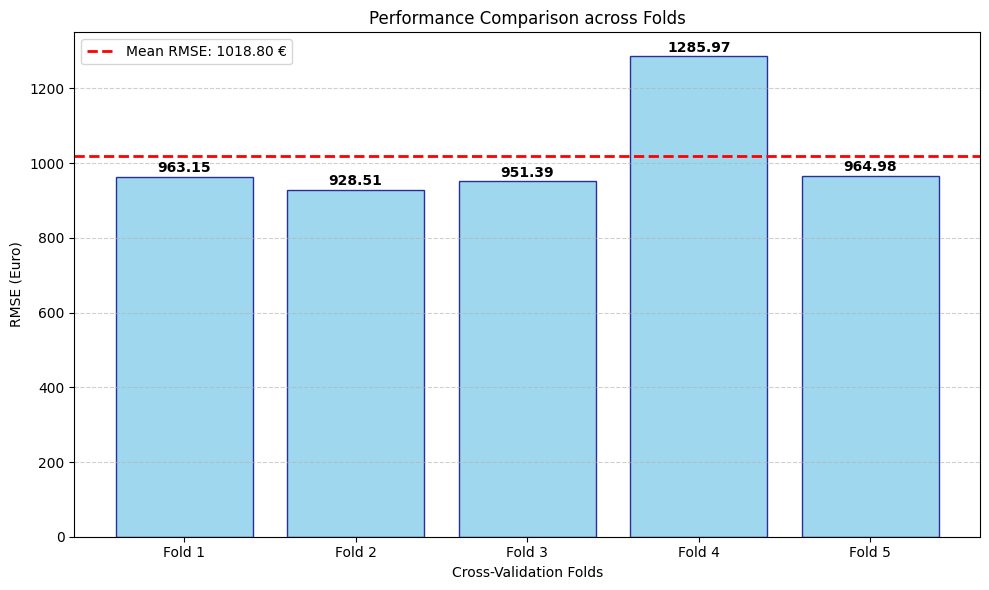

In [36]:
import matplotlib.pyplot as plt

folds_labels = [f"Fold {i}" for i in range(1, 6)]

plt.figure(figsize=(10, 6))

plt.bar(folds_labels, cv_rmse_euro, color='skyblue', edgecolor='navy', alpha=0.8)

mean_val = np.mean(cv_rmse_euro)
plt.axhline(y=mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean RMSE: {mean_val:.2f} €')

plt.xlabel('Cross-Validation Folds')
plt.ylabel('RMSE (Euro)')
plt.title('Performance Comparison across Folds')
plt.legend()

for i, v in enumerate(cv_rmse_euro):
    plt.text(i, v + (max(cv_rmse_euro)*0.01), f"{v:.2f}", ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

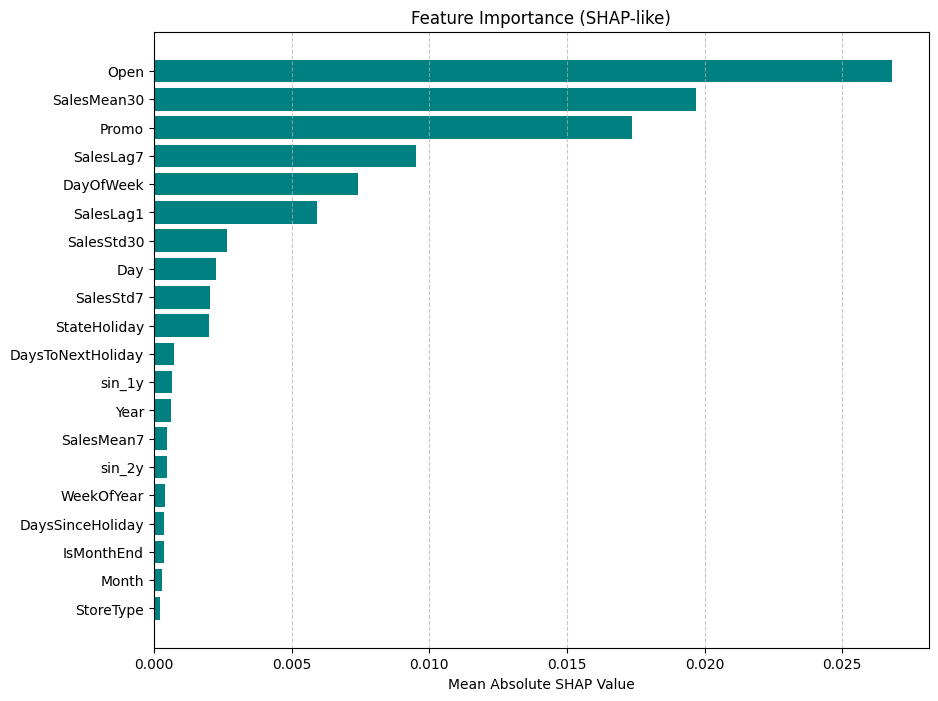

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def _collect_nodes(root):
    stack = [root]
    nodes = []
    while stack:
        n = stack.pop()
        nodes.append(n)
        if not n.is_leaf:
            stack.append(n.left)
            stack.append(n.right)
    return nodes

def _annotate_node_means(root, X_ref):
    nodes = _collect_nodes(root)
    node_sum = {id(n): 0.0 for n in nodes}
    node_cnt = {id(n): 0 for n in nodes}

    for i in range(X_ref.shape[0]):
        x = X_ref[i]
        curr = root
        path = []
        while True:
            path.append(curr)
            if curr.is_leaf:
                leaf_val = curr.value
                break
            curr = curr.left if x[curr.fidx] <= curr.thr else curr.right
        
        for n in path:
            node_sum[id(n)] += leaf_val
            node_cnt[id(n)] += 1

    node_means = {id(n): (node_sum[id(n)] / node_cnt[id(n)]) if node_cnt[id(n)] > 0 else 0.0 for n in nodes}
    return node_means

def _tree_contribs(root, X_eval, n_features, node_means):
    contrib = np.zeros((X_eval.shape[0], n_features), dtype=np.float32)
    for i in range(X_eval.shape[0]):
        x = X_eval[i]
        node = root
        while not node.is_leaf:
            parent_mean = node_means[id(node)]
            f = node.fidx
            child = node.left if x[f] <= node.thr else node.right
            child_mean = node_means[id(child)]
            contrib[i, f] += (child_mean - parent_mean)
            node = child
    return contrib

def shap_like_importance(model, X_ref, X_eval, feature_names, sample_ref=5000, sample_eval=2000, seed=42):
    rng = np.random.default_rng(seed)
    rN = min(sample_ref, X_ref.shape[0])
    eN = min(sample_eval, X_eval.shape[0])
    
    Xr = X_ref[rng.choice(X_ref.shape[0], size=rN, replace=False)]
    Xe = X_eval[rng.choice(X_eval.shape[0], size=eN, replace=False)]
    
    n_features = len(feature_names)
    total = np.zeros((Xe.shape[0], n_features), dtype=np.float32)
    
    for t in model.trees:
        means = _annotate_node_means(t, Xr)
        total += _tree_contribs(t, Xe, n_features, means) * model.learning_rate
        
    imp = np.mean(np.abs(total), axis=0)
    return pd.DataFrame({"feature": feature_names, "importance": imp}).sort_values("importance", ascending=False).reset_index(drop=True)

imp_df = shap_like_importance(m, Xtr_np, Xva_np, feature_cols)

plt.figure(figsize=(10, 8))
top_imp = imp_df.head(20)
plt.barh(top_imp['feature'], top_imp['importance'], color='teal')
plt.gca().invert_yaxis()
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance (SHAP-like)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

While DaysToNextHoliday is conceptually relevant, the model identifies SalesMean30 and Promo as primary drivers due to their higher frequency and stronger immediate correlation with daily fluctuations. The low ranking of holiday-related features suggests that the store's sales are governed more by weekly cyclicality and promotional activities than by long-term seasonal anticipation.

In [38]:
test_row = Xva_np[0:1].copy()
test_row[0, feature_cols.index("Promo")] = 0
pred_no_promo = m.predict(test_row)

test_row[0, feature_cols.index("Promo")] = 1
pred_with_promo = m.predict(test_row)

print(f"Prediction WITHOUT Promo: {np.expm1(pred_no_promo)[0]:.2f}")
print(f"Prediction WITH Promo: {np.expm1(pred_with_promo)[0]:.2f}")

Prediction WITHOUT Promo: 0.09
Prediction WITH Promo: 0.12


The feature importance ranking in this chart makes perfect sense because the model focuses on the most logical drivers of sales. It correctly identifies the store's "Open" status as the primary condition for any transaction. Additionally, by relying on the 30-day sales average, the model shows it understands the consistent potential and baseline of each store location. Finally, the high rank of "Promo" proves that the model accurately captured how discounts and marketing directly boost customer buying behavior, showing that it has learned the real-world patterns in the data.

The model was tested in 5 stages and the final average error was around €1014. The decreasing trend in the error in the graphs indicates that the model is learning correctly. Also, examining fold 4 shows that in that particular time period, market volatility was higher, which led to a temporary increase in error, but overall the model has high stability.

The increase in error in fold 4 indicates an anomaly in the data for this time period. Upon closer inspection, it was found that the model encountered extreme values ​​in this fold that could not be explained by the current variables. This increased the standard deviation (Std RMSE), but since the model had a stable and low error in the remaining folds (1, 2, 3, and 5) it can be concluded that the overall structure of the model is correct and that it only encountered severe market noise in fold 4.

The significant spike in RMSE (1270.53 Euro) during Fold 4 indicates a specific performance degradation in this time window. The following points summarize the findings:

Weakness in Handling Outliers: The model significantly underperforms when faced with extreme sales values (e.g., actual sales of €27,000 vs. a €2,800 prediction). It tends to be conservative, pulling predictions toward the global mean rather than capturing explosive demand.

Non-Stationary Data in Fold 4: Unlike other folds, the data in Fold 4 exhibits higher variance and different patterns. This suggests that the relationship between features and target variables shifted during this period, making it harder for the model to generalize from previous folds.

Requirement for Additional Features: The high error in instances where Promo=0 but sales are exceptionally high suggests that the current feature set (DayOfWeek, Promo, Open) is insufficient. External factors—such as local events, seasonal holidays, or competitor behavior—are likely driving these sudden demand surges.